# Lecture 9.3: Case Studies


In [4]:
library(tidyverse)
library(lubridate)
library(forcats)
#install.packages("tidytext")
library(tidytext)


## Trump Twitter data
We will now use what we have learned in the past two classes to analyze some real data. 

In [6]:
load("trumptwitter.RData")

In [7]:
trump_tweets %>% slice(1)

source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<lgl>
Twitter Web Client,20595488004775936,"WIshing everyone a happy, healthy and prosperous New Year!",Thu Dec 30 21:42:01 +0000 2010,144,NA,42,FALSE


`trump_tweets` is a dataset of all 41,958 Tweets that Donald Trump has sent since 2010 to 2019.

### Task #1
Each tweet has a timestamp in the `created_at` column. We want to convert this column to a proper date-time object so that we can analyze the time component of these tweets.

In [14]:
trump_tweets2 <- trump_tweets %>% mutate(
    dt=str_replace(created_at,
    "\\w+ (\\w+ \\d+) ([\\d:]+) \\+0000 (\\d{4})",
    "\\1 \\3 \\2") %>% mdy_hms) %>% print

# A tibble: 41,958 × 9
   source  id_str text  created_at retweet_count in_reply_to_use… favorite_count
   <chr>   <chr>  <chr> <chr>              <int> <chr>                     <int>
 1 Twitte… 20595… "WIs… Thu Dec 3…           144 NA                           42
 2 Twitte… 17979… "Wis… Thu Dec 2…           109 NA                           55
 3 Twitte… 15413… "Don… Thu Dec 1…           112 NA                           20
 4 Twitte… 14785… "I'l… Tue Dec 1…           250 NA                           37
 5 Twitte… 14359… "...… Mon Dec 1…            12 NA                            6
 6 Twitte… 14358… "Tho… Mon Dec 1…            14 NA                            6
 7 Twitte… 14356… "All… Mon Dec 1…            24 NA                            8
 8 Twitte… 13242… "Con… Fri Dec 1…            44 NA                           12
 9 Twitte… 12960… "Ton… Thu Dec 0…            55 NA                            7
10 Twitte… 10355… "Ton… Thu Dec 0…            24 NA                            3
# … w

### Task #2
Plot the number of Tweets that Donald Trump has made for each quarter of the year from 2010 to present.

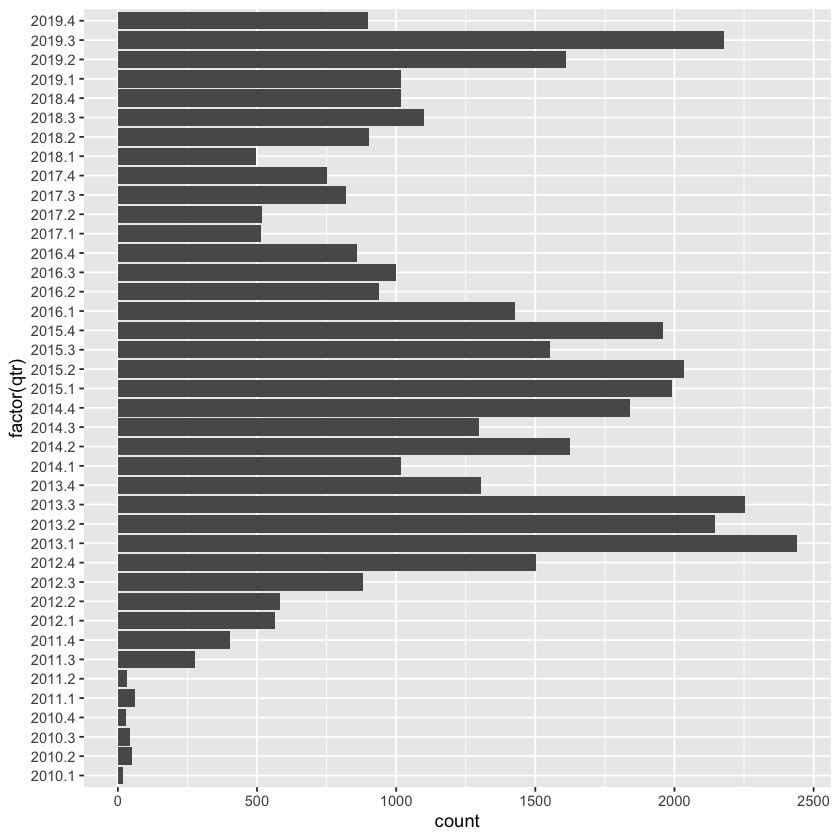

In [15]:
trump_tweets2 %>% mutate(year = year(dt), 
                         qtr = quarter(dt, with_year = T)) %>% 
    ggplot + geom_bar(aes(x=factor(qtr))) + coord_flip()

### Task #3
Recall that `words` contains common English words. After filtering out these words, and all words that were shorter than six characters, the most common words that Trump used in 2018 were:

```
# A tibble: 11 x 2
   words               n
   <chr>           <int>
 1 american          161
 2 border            269
 3 collusion         133
 4 democrats         291
 5 military          183
 6 president         356
 7 realdonaldtrump   182
 8 russia            133
 9 security          151
10 states            150
11 united            150

```

What about for 2019?

The unnest() function can then be useful to expand a vector of string so each row of the tibble corresponds to one word in one tweet.


In [16]:
filter(trump_tweets2, year(dt) == 2019) %>% unnest_tokens(output = word, input = text)

source,id_str,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,dt,word
<chr>,<chr>,<chr>,<int>,<chr>,<int>,<lgl>,<dttm>,<chr>
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,can
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,you
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,believe
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,that
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,shifty
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,adam
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,schiff
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,the
Twitter for iPhone,1188929062611361792,Mon Oct 28 21:22:32 +0000 2019,27770,NA,107510,FALSE,2019-10-28 21:22:32,biggest


In [17]:
filter(trump_tweets2, year(dt) == 2019) %>% 
    unnest_tokens(output = word, input = text) %>%
    select(created_at, word) %>% 
    count(word) %>% 
    filter(str_length(word) >= 6) %>% top_n(15)

Selecting by n



word,n
<chr>,<int>
america,236
american,232
because,182
border,384
country,390
democrats,512
mueller,191
nothing,196
people,512


In [18]:
head(words)

[1] "a"        "able"     "about"    "absolute" "accept"   "account"

### Task #4
What were Trump's favorite #hashtags?

In [19]:
filter(trump_tweets2, str_detect(text, "#")) %>% 
    unnest_tokens(input=text, output=word, token="tweets") %>% 
    filter(str_detect(word, "^#")) %>% 
    count(year(dt), word) %>% top_n(20) %>% arrange(desc(n))

Using `to_lower = TRUE` with `token = 'tweets'` may not preserve URLs.

Selecting by n



year(dt),word,n
<dbl>,<chr>,<int>
2015,#trump2016,415
2016,#trump2016,347
2015,#makeamericagreatagain,279
2016,#makeamericagreatagain,275
2013,#celebapprentice,140
2015,#celebapprentice,139
2016,#maga,108
2014,#trump2016,107
2015,#celebrityapprentice,102


### Task #5
"Sentiment analysis" refers to the act of assigning a label such as "positive" or "negative" to a piece of text. We will perform a simple type of sentiment analysis by assigning a numerical score to certain words in each tweet, using the `sentiments` table:

In [20]:
load("sentiment.RData")
sentiments %>% print

# A tibble: 2,477 × 2
   word       value
   <chr>      <dbl>
 1 abandon       -2
 2 abandoned     -2
 3 abandons      -2
 4 abducted      -2
 5 abduction     -2
 6 abductions    -2
 7 abhor         -3
 8 abhorred      -3
 9 abhorrent     -3
10 abhors        -3
# … with 2,467 more rows


An example of how this works:

In [21]:
trump_sentiments <- trump_tweets2 %>%
    mutate(month = month(dt), year = year(dt)) %>%
    unnest_tokens(input=text, output=word, token="tweets") %>% 
    inner_join(sentiments) %>% print

Using `to_lower = TRUE` with `token = 'tweets'` may not preserve URLs.

Joining, by = "word"



# A tibble: 73,581 × 12
   source             id_str created_at retweet_count in_reply_to_use… favorite_count
   <chr>              <chr>  <chr>              <int> <chr>                     <int>
 1 Twitter Web Client 20595… Thu Dec 3…           144 NA                           42
 2 Twitter Web Client 20595… Thu Dec 3…           144 NA                           42
 3 Twitter Web Client 20595… Thu Dec 3…           144 NA                           42
 4 Twitter Web Client 20595… Thu Dec 3…           144 NA                           42
 5 Twitter Web Client 17979… Thu Dec 2…           109 NA                           55
 6 Twitter Web Client 17979… Thu Dec 2…           109 NA                           55
 7 Twitter Web Client 15413… Thu Dec 1…           112 NA                           20
 8 Twitter Web Client 15413… Thu Dec 1…           112 NA                           20
 9 Twitter Web Client 15413… Thu Dec 1…           112 NA                           20
10 Twitter Web Client 14785… T

Average the sentiment by month for the full data set, and make a plot of the monthly average from 2014 to 2018. 

Trump declared his candidacy in June of 2015. Notice anything?

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



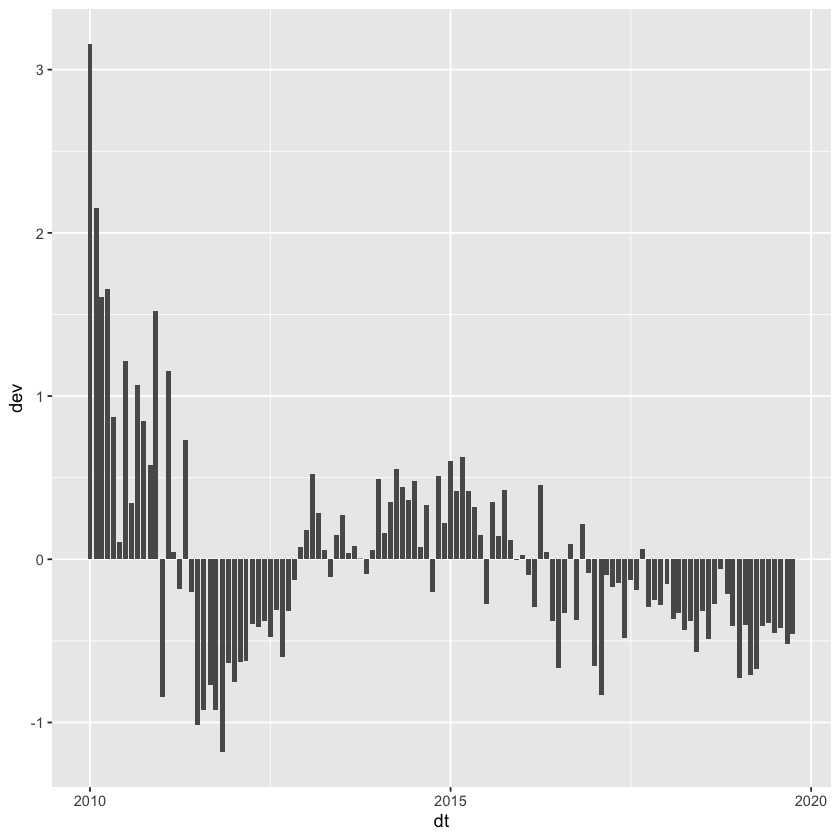

In [22]:
trump_sentiments %>% group_by(year, month) %>% 
    summarize(m = mean(value), n = n()) %>% ungroup %>%
    mutate(dev = m - mean(m), dt = make_date(year, month, 1)) %>% 
    ggplot + geom_col(aes(x = dt, y = dev))